In [1]:
# Import necessary libraries as requested [cite: 5]
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (built into Seaborn for easy access)
df = sns.load_dataset('titanic')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# 1. Check data types and missing values
print("\n--- Data Info ---")
df.info()

# 2. Statistical summary of numerical columns
print("\n--- Statistical Description ---")
display(df.describe())

# 3. Check value counts for categorical data (e.g., 'class')
print("\n--- Value Counts for Passenger Class ---")
print(df['class'].value_counts())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

--- Statistical Description ---


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



--- Value Counts for Passenger Class ---
class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [3]:
# Fill missing age values with the median
df['age'].fillna(df['age'].median(), inplace=True)

# Drop columns with too many missing values (like 'deck') for cleaner analysis
df.drop(columns=['deck'], inplace=True)

print("Missing values handled.")

Missing values handled.


/tmp/ipython-input-4012228794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


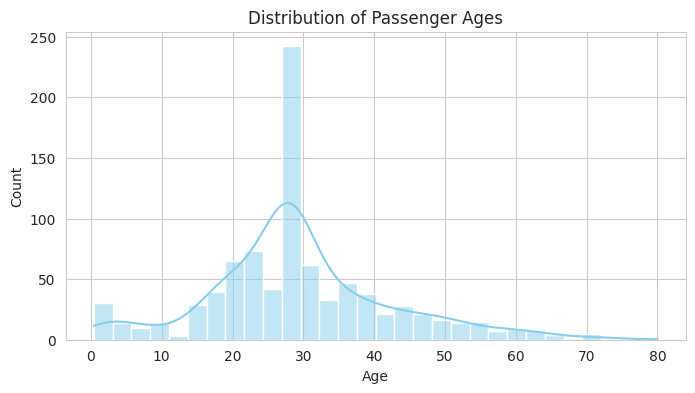

Observation: The majority of passengers were between 20 and 40 years old.


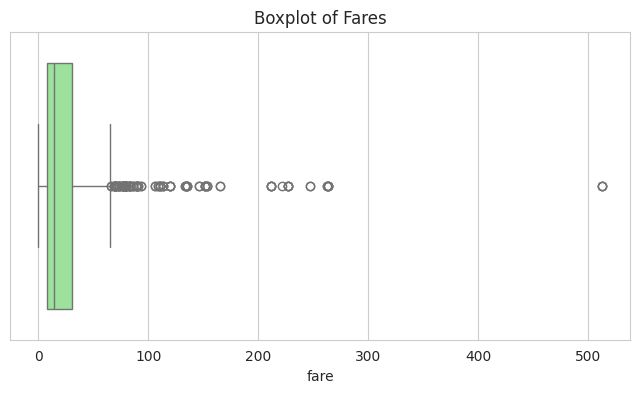

Observation: There are significant outliers in ticket prices (fares).


In [4]:
# Set the visual style
sns.set_style("whitegrid")

# Histogram: Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()
print("Observation: The majority of passengers were between 20 and 40 years old.") # [cite: 12]

# Boxplot: Fare distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare'], color='lightgreen')
plt.title('Boxplot of Fares')
plt.show()
print("Observation: There are significant outliers in ticket prices (fares).")

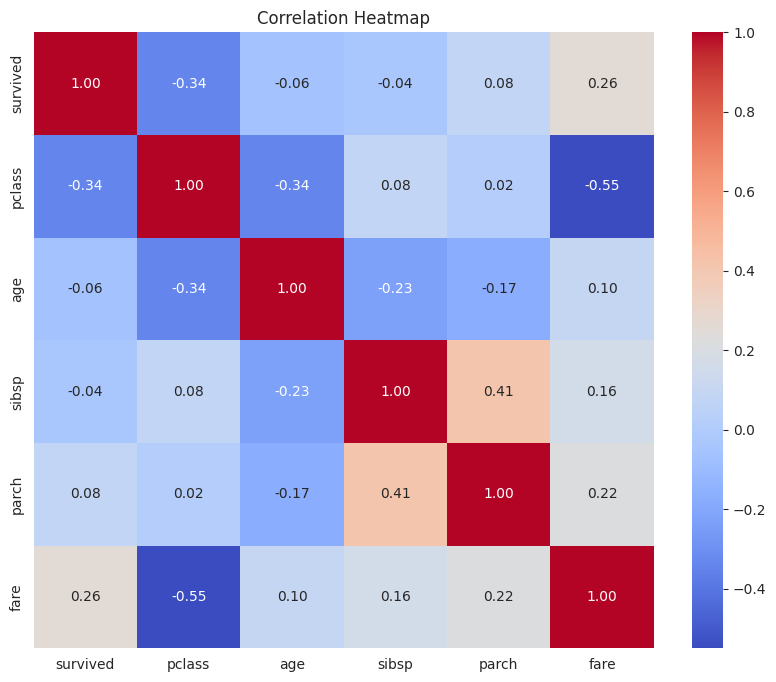

Observation: Fare and Survived have a slight positive correlation.


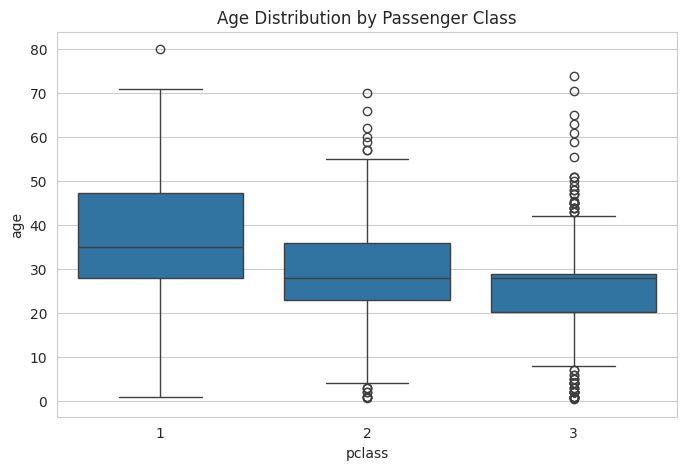

Observation: 1st class passengers tend to be older on average than 3rd class.


In [5]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print("Observation: Fare and Survived have a slight positive correlation.")

# Boxplot: Age vs. Class (Relationship) [cite: 10]
plt.figure(figsize=(8, 5))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()
print("Observation: 1st class passengers tend to be older on average than 3rd class.")

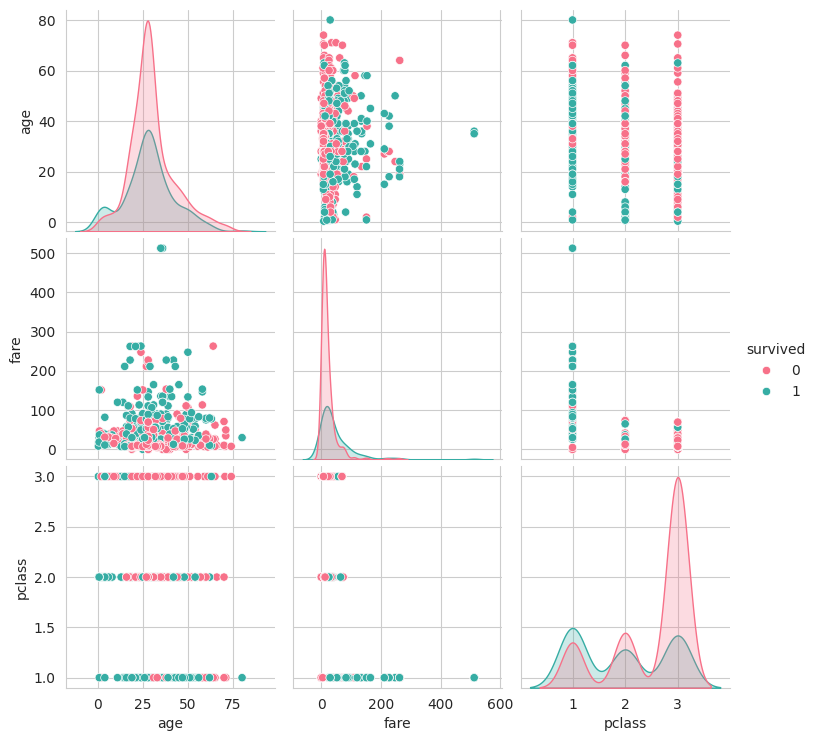

Observation: Higher fares seem to correlate with higher survival rates.


In [6]:
# Pairplot to see relationships across multiple variables
# subsetting data to make the plot readable
subset = df[['age', 'fare', 'pclass', 'survived']]
sns.pairplot(subset, hue='survived', palette='husl') #
plt.show()
print("Observation: Higher fares seem to correlate with higher survival rates.")